# Lê Nguyễn Trung 19146024 
# Bài Tập CNN VND

In [1]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Dense, Activation, Flatten, Input, Dropout
from tensorflow.keras.optimizers import SGD
import pickle

Chạy file tiengiay.ipynb trong VS code để tạo file 11vnd.data -> up file data lên gg drive.

In [9]:
# tai data tu google drive
def load_data():
    file = open('/content/drive/MyDrive/Data/11vnd.data', 'rb')
    (pixels, labels) = pickle.load(file)
    file.close()
    print(pixels.shape)
    print(labels.shape)
    return pixels, labels

In [10]:
X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=100)

(5391, 128, 128, 3)
(5391, 11)


In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2048, activation='relu'))
model.add(Dense(11, activation='softmax'))

In [12]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [13]:
history = model.fit(aug.flow(X_train, y_train, batch_size=64),epochs=40, validation_data=aug.flow(X_test,y_test,batch_size=64), verbose=1)

Epoch 1/40
68/68 [==============================] - 34s 453ms/step - loss: 3.0371 - accuracy: 0.1528 - val_loss: 2.1851 - val_accuracy: 0.2456
Epoch 2/40
68/68 [==============================] - 29s 433ms/step - loss: 1.8885 - accuracy: 0.3237 - val_loss: 1.6305 - val_accuracy: 0.4032
Epoch 3/40
68/68 [==============================] - 29s 432ms/step - loss: 1.4502 - accuracy: 0.4455 - val_loss: 1.2713 - val_accuracy: 0.5283
Epoch 4/40
68/68 [==============================] - 30s 445ms/step - loss: 1.1924 - accuracy: 0.5408 - val_loss: 1.1000 - val_accuracy: 0.6209
Epoch 5/40
68/68 [==============================] - 28s 411ms/step - loss: 1.2402 - accuracy: 0.5462 - val_loss: 1.4682 - val_accuracy: 0.4504
Epoch 6/40
68/68 [==============================] - 24s 358ms/step - loss: 1.1669 - accuracy: 0.5626 - val_loss: 1.1251 - val_accuracy: 0.6015
Epoch 7/40
68/68 [==============================] - 25s 363ms/step - loss: 0.9193 - accuracy: 0.6510 - val_loss: 0.8427 - val_accuracy: 0.6812

In [14]:
model.save('money.h5')


In [15]:
from keras.models import load_model
import cv2 as cv
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

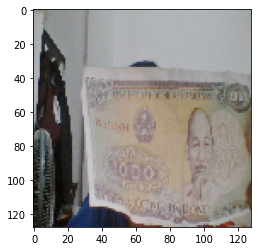

In [50]:
##
img = load_img('/content/1k.jpg',target_size=(128,128))
plt.imshow(img)


In [44]:
class_name = ['200','500','1000','2000','5000','10000','20000','50000','100000','200000','500000']

In [49]:
img = cv.imread('/content/1k.jpg')
img = cv.resize(img, dsize=(128, 128))
img = img.astype('float')*1./255
img = np.expand_dims(img, axis=0)

In [48]:

model_5 = load_model('money.h5')
predict = model_5.predict(img)
class_name[np.argmax(predict[0])], (predict[0])

('1000', array([1.8566988e-06, 7.6601353e-08, 6.1934817e-01, 3.1925045e-04,
        5.1441816e-07, 3.2258195e-01, 1.2977833e-05, 4.2449549e-02,
        1.1049405e-02, 4.2179255e-03, 1.8369945e-05], dtype=float32))